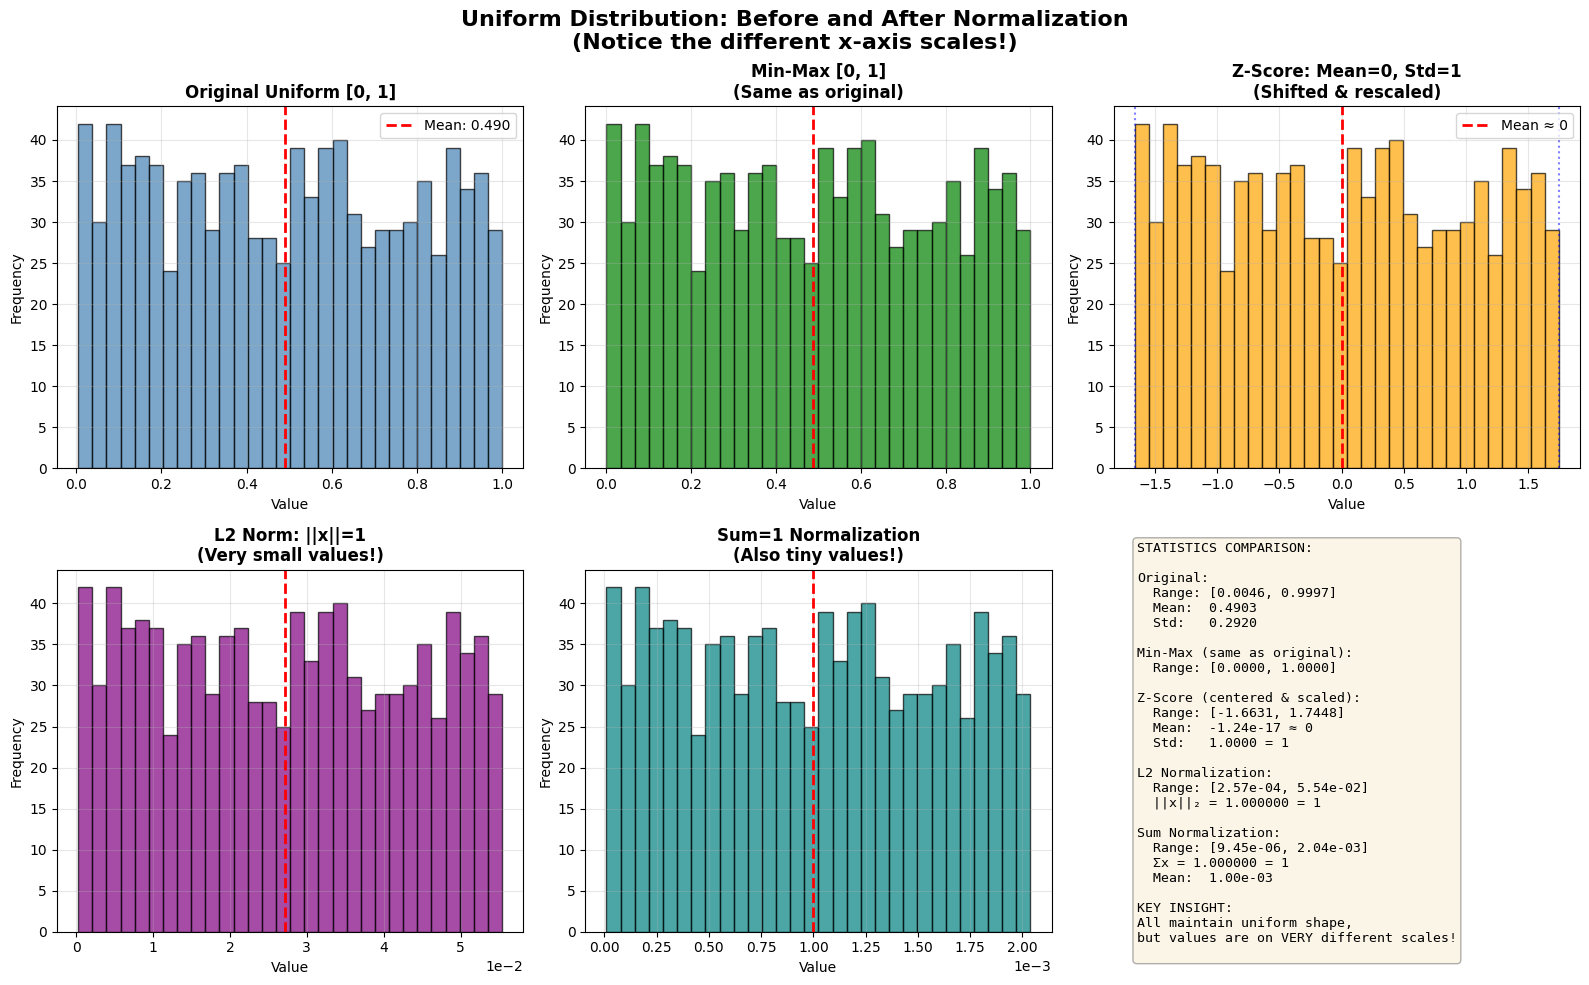

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate uniform random distribution [0, 1]
n_samples = 1000
original = np.random.uniform(0, 1, n_samples)

# Different normalization methods
# 1. Min-Max normalization to [0, 1] (already there, but showing the formula)
min_max_norm = (original - original.min()) / (original.max() - original.min())

# 2. Z-score standardization (mean=0, std=1)
z_score_norm = (original - original.mean()) / original.std()

# 3. L2 normalization (unit vector)
l2_norm = original / np.linalg.norm(original)

# 4. Normalize to sum to 1 (probability distribution)
sum_norm = original / original.sum()

# Create plots with DIFFERENT x-axis scales to show the differences
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Uniform Distribution: Before and After Normalization\n(Notice the different x-axis scales!)', 
             fontsize=16, fontweight='bold')

# Original distribution
axes[0, 0].hist(original, bins=30, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].set_title('Original Uniform [0, 1]', fontweight='bold')
axes[0, 0].set_xlabel('Value')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(original.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {original.mean():.3f}')
axes[0, 0].grid(alpha=0.3)
axes[0, 0].legend()

# Min-Max normalized (same as original in this case)
axes[0, 1].hist(min_max_norm, bins=30, edgecolor='black', alpha=0.7, color='green')
axes[0, 1].set_title('Min-Max [0, 1]\n(Same as original)', fontweight='bold')
axes[0, 1].set_xlabel('Value')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(min_max_norm.mean(), color='red', linestyle='--', linewidth=2)
axes[0, 1].grid(alpha=0.3)

# Z-score normalized - CENTER AT ZERO!
axes[0, 2].hist(z_score_norm, bins=30, edgecolor='black', alpha=0.7, color='orange')
axes[0, 2].set_title('Z-Score: Mean=0, Std=1\n(Shifted & rescaled)', fontweight='bold')
axes[0, 2].set_xlabel('Value')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].axvline(0, color='red', linestyle='--', linewidth=2, label=f'Mean ≈ 0')
axes[0, 2].axvline(z_score_norm.min(), color='blue', linestyle=':', alpha=0.5)
axes[0, 2].axvline(z_score_norm.max(), color='blue', linestyle=':', alpha=0.5)
axes[0, 2].grid(alpha=0.3)
axes[0, 2].legend()

# L2 normalized - TINY VALUES!
axes[1, 0].hist(l2_norm, bins=30, edgecolor='black', alpha=0.7, color='purple')
axes[1, 0].set_title('L2 Norm: ||x||=1\n(Very small values!)', fontweight='bold')
axes[1, 0].set_xlabel('Value')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].axvline(l2_norm.mean(), color='red', linestyle='--', linewidth=2)
axes[1, 0].ticklabel_format(style='scientific', axis='x', scilimits=(0,0))
axes[1, 0].grid(alpha=0.3)

# Sum normalized - ALSO TINY!
axes[1, 1].hist(sum_norm, bins=30, edgecolor='black', alpha=0.7, color='teal')
axes[1, 1].set_title('Sum=1 Normalization\n(Also tiny values!)', fontweight='bold')
axes[1, 1].set_xlabel('Value')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].axvline(sum_norm.mean(), color='red', linestyle='--', linewidth=2)
axes[1, 1].ticklabel_format(style='scientific', axis='x', scilimits=(0,0))
axes[1, 1].grid(alpha=0.3)

# Statistics comparison - MORE DETAILED
stats_text = f"""STATISTICS COMPARISON:

Original:
  Range: [{original.min():.4f}, {original.max():.4f}]
  Mean:  {original.mean():.4f}
  Std:   {original.std():.4f}

Min-Max (same as original):
  Range: [{min_max_norm.min():.4f}, {min_max_norm.max():.4f}]

Z-Score (centered & scaled):
  Range: [{z_score_norm.min():.4f}, {z_score_norm.max():.4f}]
  Mean:  {z_score_norm.mean():.2e} ≈ 0
  Std:   {z_score_norm.std():.4f} = 1

L2 Normalization:
  Range: [{l2_norm.min():.2e}, {l2_norm.max():.2e}]
  ||x||₂ = {np.linalg.norm(l2_norm):.6f} = 1

Sum Normalization:
  Range: [{sum_norm.min():.2e}, {sum_norm.max():.2e}]
  Σx = {sum_norm.sum():.6f} = 1
  Mean:  {sum_norm.mean():.2e}

KEY INSIGHT:
All maintain uniform shape,
but values are on VERY different scales!
"""

axes[1, 2].text(0.05, 0.5, stats_text, fontsize=9.5, family='monospace',
                verticalalignment='center', transform=axes[1, 2].transAxes,
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

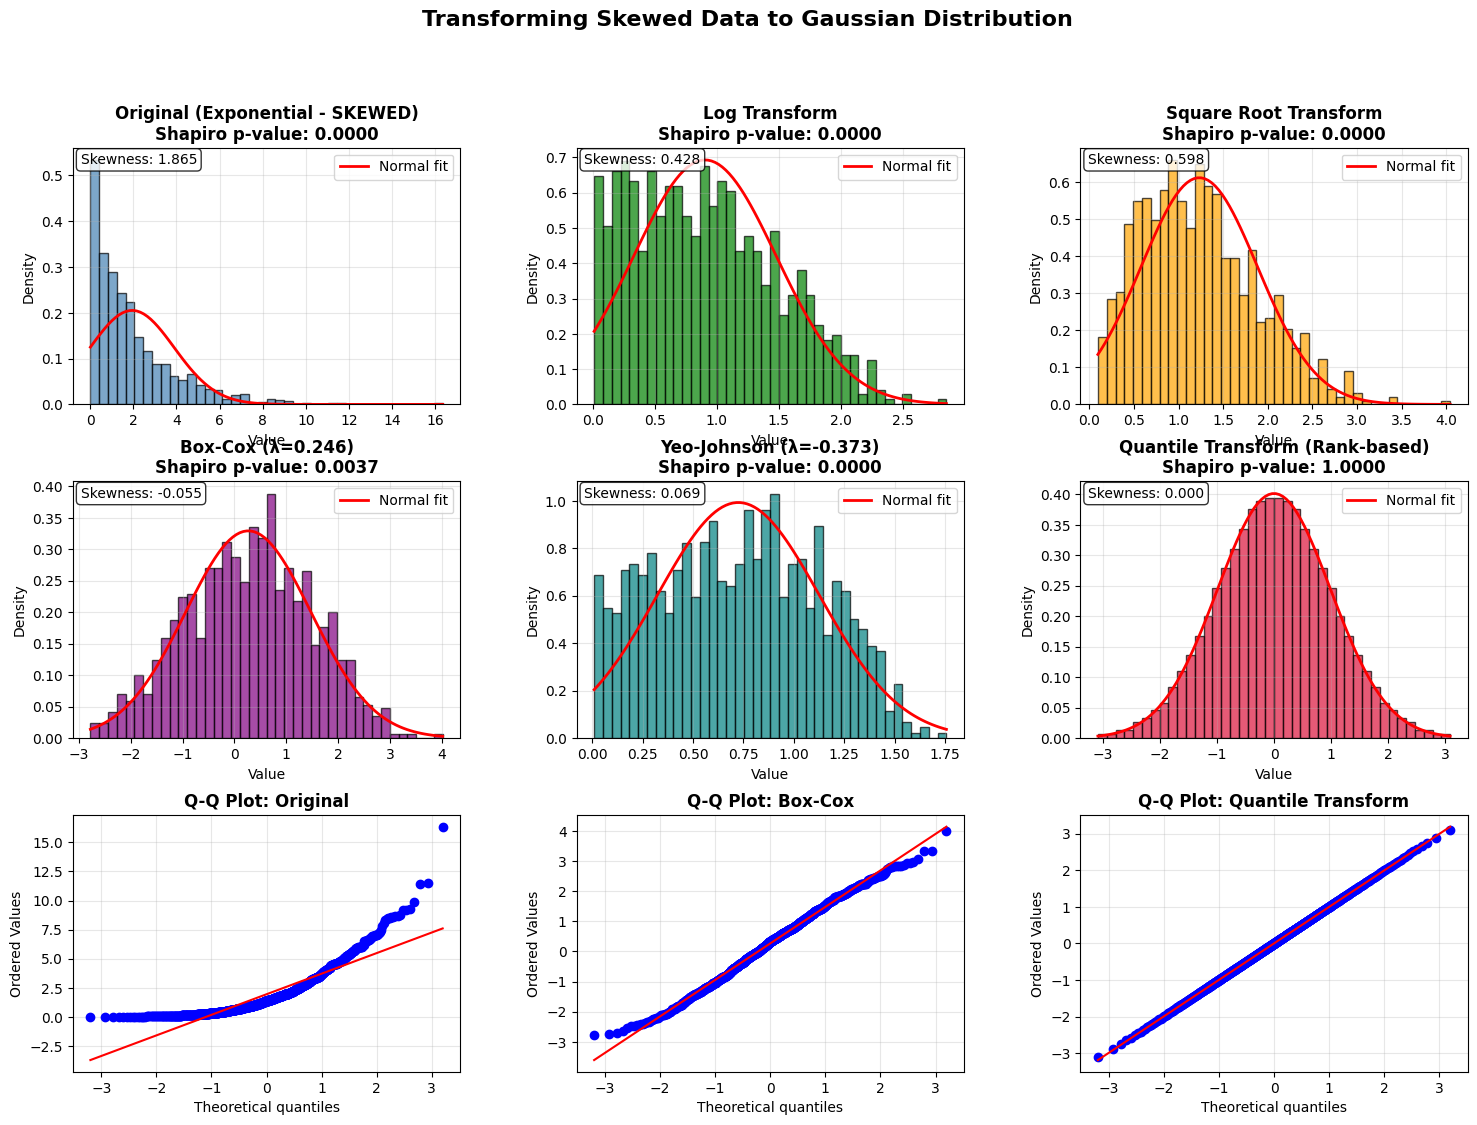


TRANSFORMATION SUMMARY

Original Data:
  Skewness: 1.865 (positive = right skew)
  Shapiro p-value: 0.0000

Log Transform:
  Skewness: 0.428
  Shapiro p-value: 0.0000

Box-Cox Transform (λ=0.246):
  Skewness: -0.055
  Shapiro p-value: 0.0037

Quantile Transform:
  Skewness: 0.000
  Shapiro p-value: 1.0000

INTERPRETATION:
Shapiro p-value > 0.05 → data is likely normally distributed
Skewness close to 0 → symmetric distribution
Q-Q plot points on line → data matches normal distribution

Quantile transform guarantees perfect normal distribution!
Box-Cox often works well for naturally skewed data


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Create a heavily SKEWED dataset (exponential distribution)
n_samples = 1000
original_data = np.random.exponential(scale=2.0, size=n_samples)

# Method 1: Log transformation (good for right-skewed data)
log_transform = np.log(original_data + 1)  # +1 to avoid log(0)

# Method 2: Square root transformation (mild skewness)
sqrt_transform = np.sqrt(original_data)

# Method 3: Box-Cox transformation (optimal power transformation)
boxcox_transform, lambda_param = stats.boxcox(original_data)

# Method 4: Yeo-Johnson transformation (works with negative values too)
yeojohnson_transform, lambda_yj = stats.yeojohnson(original_data)

# Method 5: Quantile transformation (rank-based, guarantees normal)
from scipy.stats import norm
ranks = stats.rankdata(original_data)
quantile_transform = norm.ppf(ranks / (len(ranks) + 1))

# Create figure with subplots
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Function to plot histogram with normality test
def plot_distribution(ax, data, title, color):
    ax.hist(data, bins=40, edgecolor='black', alpha=0.7, color=color, density=True)
    
    # Fit and plot normal distribution
    mu, sigma = data.mean(), data.std()
    x = np.linspace(data.min(), data.max(), 100)
    ax.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2, label='Normal fit')
    
    # Shapiro-Wilk test for normality (p > 0.05 means likely normal)
    statistic, p_value = stats.shapiro(data[:5000])  # limit to 5000 for speed
    
    ax.set_title(f'{title}\nShapiro p-value: {p_value:.4f}', fontweight='bold')
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.legend()
    ax.grid(alpha=0.3)
    
    # Add skewness info
    skewness = stats.skew(data)
    ax.text(0.02, 0.98, f'Skewness: {skewness:.3f}', 
            transform=ax.transAxes, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Original data (skewed)
ax1 = fig.add_subplot(gs[0, 0])
plot_distribution(ax1, original_data, 'Original (Exponential - SKEWED)', 'steelblue')

# Log transformation
ax2 = fig.add_subplot(gs[0, 1])
plot_distribution(ax2, log_transform, 'Log Transform', 'green')

# Square root transformation
ax3 = fig.add_subplot(gs[0, 2])
plot_distribution(ax3, sqrt_transform, 'Square Root Transform', 'orange')

# Box-Cox transformation
ax4 = fig.add_subplot(gs[1, 0])
plot_distribution(ax4, boxcox_transform, f'Box-Cox (λ={lambda_param:.3f})', 'purple')

# Yeo-Johnson transformation
ax5 = fig.add_subplot(gs[1, 1])
plot_distribution(ax5, yeojohnson_transform, f'Yeo-Johnson (λ={lambda_yj:.3f})', 'teal')

# Quantile transformation
ax6 = fig.add_subplot(gs[1, 2])
plot_distribution(ax6, quantile_transform, 'Quantile Transform (Rank-based)', 'crimson')

# Q-Q plots (compare to normal distribution)
ax7 = fig.add_subplot(gs[2, 0])
stats.probplot(original_data, dist="norm", plot=ax7)
ax7.set_title('Q-Q Plot: Original', fontweight='bold')
ax7.grid(alpha=0.3)

ax8 = fig.add_subplot(gs[2, 1])
stats.probplot(boxcox_transform, dist="norm", plot=ax8)
ax8.set_title('Q-Q Plot: Box-Cox', fontweight='bold')
ax8.grid(alpha=0.3)

ax9 = fig.add_subplot(gs[2, 2])
stats.probplot(quantile_transform, dist="norm", plot=ax9)
ax9.set_title('Q-Q Plot: Quantile Transform', fontweight='bold')
ax9.grid(alpha=0.3)

fig.suptitle('Transforming Skewed Data to Gaussian Distribution', 
             fontsize=16, fontweight='bold', y=0.995)

plt.show()

# Print summary
print("\n" + "="*70)
print("TRANSFORMATION SUMMARY")
print("="*70)
print(f"\nOriginal Data:")
print(f"  Skewness: {stats.skew(original_data):.3f} (positive = right skew)")
print(f"  Shapiro p-value: {stats.shapiro(original_data[:5000])[1]:.4f}")

print(f"\nLog Transform:")
print(f"  Skewness: {stats.skew(log_transform):.3f}")
print(f"  Shapiro p-value: {stats.shapiro(log_transform[:5000])[1]:.4f}")

print(f"\nBox-Cox Transform (λ={lambda_param:.3f}):")
print(f"  Skewness: {stats.skew(boxcox_transform):.3f}")
print(f"  Shapiro p-value: {stats.shapiro(boxcox_transform[:5000])[1]:.4f}")

print(f"\nQuantile Transform:")
print(f"  Skewness: {stats.skew(quantile_transform):.3f}")
print(f"  Shapiro p-value: {stats.shapiro(quantile_transform[:5000])[1]:.4f}")

print("\n" + "="*70)
print("INTERPRETATION:")
print("="*70)
print("Shapiro p-value > 0.05 → data is likely normally distributed")
print("Skewness close to 0 → symmetric distribution")
print("Q-Q plot points on line → data matches normal distribution")
print("\nQuantile transform guarantees perfect normal distribution!")
print("Box-Cox often works well for naturally skewed data")
print("="*70)